# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


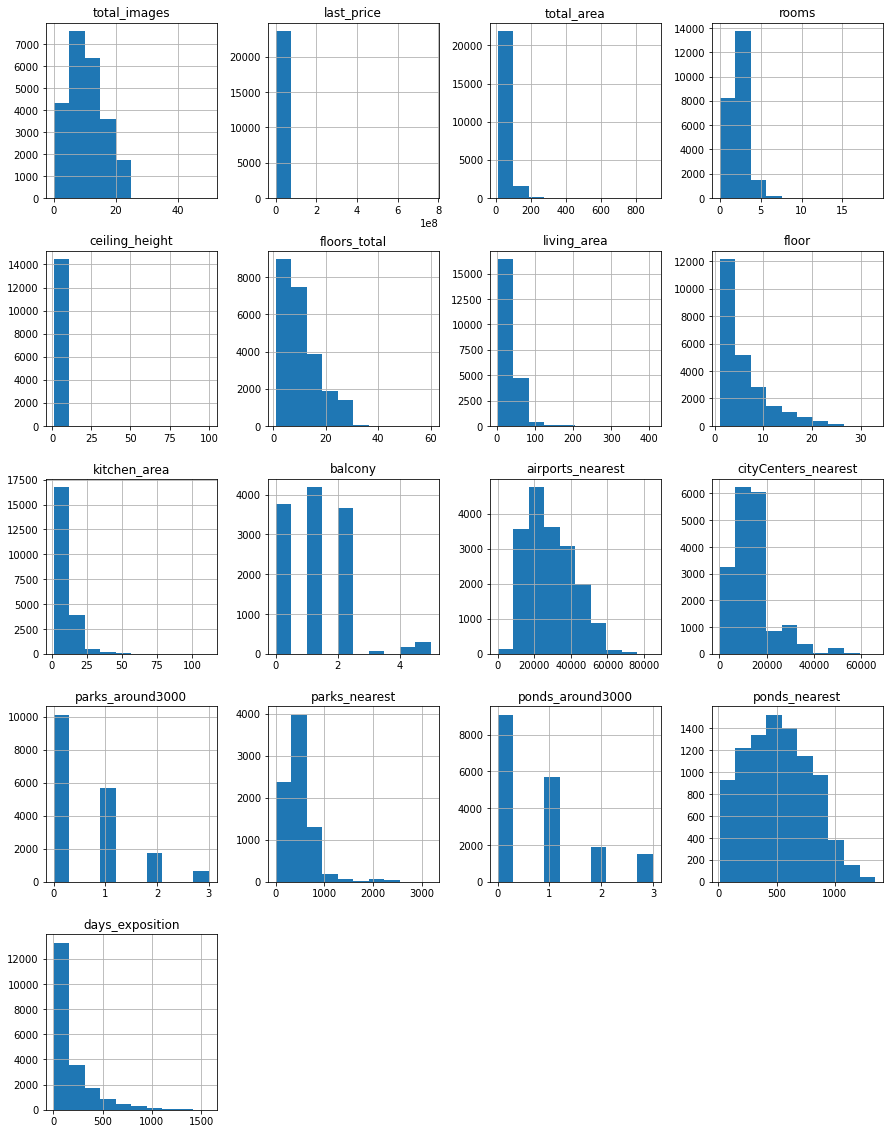

In [3]:
data.hist(figsize=(15,20))
plt.show()

### Предобработка данных

#### Поиск и изучение пропущеных значений.


***Процент пропущенных значений по столбцам.***

In [4]:
data.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

In [5]:
data[['balcony','days_exposition','ponds_around3000','parks_around3000']]=data[['balcony','days_exposition','ponds_around3000','parks_around3000']].fillna(0)

In [6]:
len(data)

23699

In [7]:
data=data.dropna(subset=['floors_total', "locality_name"])

In [8]:
len(data)

23565

Заполнение столбцов 'ceiling_height' и 'cityCenters_nearest'медианным значением по регионам.

In [9]:
data['ceiling_height']=data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))


In [10]:
data.info() #  почему то остались пропуски в cityCenters_nearest, хотя заполнили их медианным значением ?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23445 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

***Заполнение пропусков:***

Отсутствующие значения в столбцах ponds_around3000, parks_around3000, balcony посчитал возможным заполнить нулями, так как отсутсвие значений в них вполне вероятно может указывать на отсутствие этих элементов как таковых- нет балкона, нет парка или водоема поблизости.

Решил удалить строки с пропущенными значениями в столбце floors_total и locality_name так как пропусков 0.3 и 0.2 %, что несущественно и роли нам не сыграет.

Так же заменил пропущенные значения в столбцах ceiling_height и cityCenters_nearest медианным значением по регионам, хотя не могу понять почему в столбце cityCenters_nearest после внесения изменений проверкой методом info, ничего не поменялось


***Изучение типов данных***


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23445 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [12]:
data[['balcony','parks_around3000','ponds_around3000','floors_total','last_price', "floors_total"]]=data[
    ['balcony','parks_around3000','ponds_around3000','floors_total','last_price', "floors_total"]].astype('int')

In [13]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d')

In [14]:
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23565, dtype: datetime64[ns]

***Изменены типы данных следующих столбцов:***

Столбцы:'balcony'(число балконов),'parks_around3000'(число парков поблизости),'ponds_around3000'(число водоемов поблизости),'last_price(стоимость квартиры)', 'floors_total'(всего этажей) поменял с float на int так как эти параметры могут быть только целыми числами.
Так же было бы логично поменять тип дынных на int в столбце  'days_exposition'(дни), но там есть пропуски,которые было решено пока не заполнять, а анализировать с ними.
Тип данных столбца 'first_day_exposition'(дата) изменен на datetime для удобства дальшей работы со временем

***Посмотрим уникальные значения в столбце locality_name, устраним неявные дубликаты.***

In [15]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
data['locality_name']=data['locality_name'].str.replace('ё','е')
data['locality_name']=data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name']=data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

***Обработка редких и выбивающиеся значений***

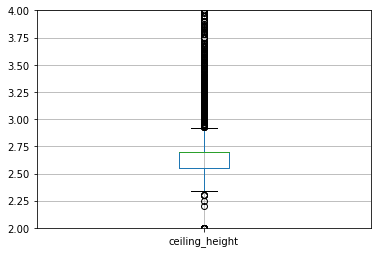

In [17]:
data.boxplot(column='ceiling_height')
plt.ylim(2, 4)
plt.show()

In [18]:
data['ceiling_height'].unique()

array([  2.7  ,   2.615,   3.03 ,   2.6  ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,   2.8  ,
         3.   ,   2.65 ,   3.2  ,   2.61 ,     nan,   3.25 ,   3.45 ,
         2.77 ,   2.85 ,   2.525,   2.57 ,   4.15 ,   3.5  ,   3.3  ,
         2.71 ,   4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,
         3.4  ,   2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.51 ,   2.78 ,
        13.85 ,   2.76 ,  25.   ,   2.58 ,   3.7  ,   5.2  ,   2.87 ,
         2.66 ,   2.59 ,   2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,
         3.11 ,   3.13 ,   3.8  ,   3.15 ,   3.55 ,   3.16 ,   3.62 ,
         3.12 ,   2.53 ,   2.74 ,   2.96 ,   2.46 ,   5.3  ,   5.   ,
         2.79 ,   2.95 ,   4.06 ,   2.94 ,   3.82 ,   3.54 ,   3.53 ,
         2.83 ,   4.7  ,   2.4  ,   3.38 ,   3.01 ,   5.6  ,   3.65 ,
         3.18 ,   3.35 ,   2.3  ,   3.57 ,   2.48 ,   2.515,   2.62 ,
         2.82 ,   2.65 ,   3.98 ,   2.63 ,   3.83 ,  27.   ,   3.52 ,
         3.95 ,   3.

In [19]:
data.loc[data['ceiling_height']>5,'ceiling_height']=data['ceiling_height']/10
data=data.loc[data['ceiling_height'].between(2,5)]
data['ceiling_height'].unique()

array([2.7  , 2.615, 3.03 , 2.6  , 2.64 , 2.5  , 2.67 , 2.55 , 2.56 ,
       3.05 , 2.75 , 2.9  , 2.56 , 2.8  , 3.   , 2.65 , 3.2  , 2.61 ,
       3.25 , 3.45 , 2.77 , 2.85 , 2.525, 2.57 , 4.15 , 3.5  , 3.3  ,
       2.71 , 4.   , 2.47 , 2.73 , 2.84 , 3.1  , 2.34 , 3.4  , 2.52 ,
       3.06 , 2.72 , 2.54 , 2.51 , 2.78 , 2.76 , 2.58 , 3.7  , 2.87 ,
       2.66 , 2.59 , 2.   , 2.45 , 3.6  , 3.9  , 2.92 , 3.11 , 3.13 ,
       3.8  , 3.15 , 3.55 , 3.16 , 3.62 , 3.12 , 2.53 , 2.74 , 2.96 ,
       2.46 , 5.   , 2.79 , 2.95 , 4.06 , 2.94 , 3.82 , 3.54 , 3.53 ,
       2.83 , 4.7  , 2.4  , 3.38 , 3.01 , 3.65 , 3.18 , 3.35 , 2.3  ,
       3.57 , 2.48 , 2.515, 2.62 , 2.82 , 2.65 , 3.98 , 2.63 , 3.83 ,
       3.52 , 3.95 , 3.75 , 2.88 , 3.67 , 3.87 , 3.66 , 3.85 , 3.86 ,
       4.19 , 3.24 , 4.8  , 4.5  , 4.2  , 3.36 , 3.08 , 3.68 , 3.07 ,
       3.37 , 3.09 , 3.26 , 3.34 , 2.81 , 3.44 , 2.97 , 3.14 , 2.725,
       4.37 , 2.68 , 2.6  , 3.22 , 3.27 , 2.675, 4.1  , 2.93 , 3.46 ,
       3.47 , 3.33 ,

In [20]:
data.duplicated().sum()

0

*В столбце с высотой потолков сначала все значения,которые больше 5 метров ( выше 5 метров потолки в обычных квартирах вряд ли существуют), разделил на 10, предполагая ,что ошиблись при занесении этих значений и точку не туда поставили и ограничил высоту от 2 до 5.
Так же проверил на дубликаты, их не обнаружено

### Посчитайте и добавьте в таблицу новые столбцы

***Цена одного квадратного метра***

In [21]:
data['price_per_metre']=data['show_start_date']/data['total_area']

***день недели публикации объявления***

In [22]:
data['weekday']=data['first_day_exposition'].dt.weekday 

***месяц публикации объявления***

In [23]:
data['month']=data['first_day_exposition'].dt.month 

***год публикации объявления***

In [24]:
data['year']=data['first_day_exposition'].dt.year 

***тип этажа квартиры***

In [25]:
def floor_types(current,total):
    if current == total:
        return 'последний'
    elif current == 1:
        return 'первый'
    return 'другой'

data['floor_type']=data.apply(lambda x: floor_types(x.floor,x.floors_total),axis=1)

***Расстояние до центра города в километрах***

In [26]:
data['km_to_city']=(data['cityCenters_nearest']/1000).apply(np.floor)
data[['cityCenters_nearest','km_to_city']]

,cityCenters_nearest,km_to_city
0,16028.0,16.0
1,18603.0,18.0
2,13933.0,13.0
3,6800.0,6.0
4,8098.0,8.0
...,...,...
23693,34104.0,34.0
23694,4232.0,4.0
23695,NaN,NaN
23697,10364.0,10.0


### Проведите исследовательский анализ данных

- общая площадь

In [27]:
data['total_area'].describe()

count    23425.000000
mean        60.349804
std         35.589880
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

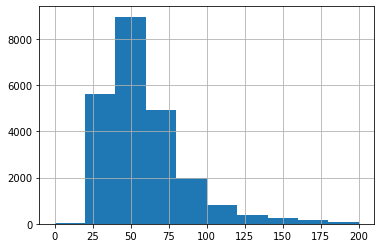

In [98]:
data['total_area'].hist(range=(0,200))

Анализируя распределение площадей квартир на основании графика и таблицы с основными статистичискими параметрами , можно сказать что общаяя площадь варируется от 12 до 900 метров, средняя площадь квартир равна почти 61 кв.м.

- жилая площадь

In [29]:
data['living_area'].describe()

count    21586.000000
mean        34.464974
std         22.029035
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

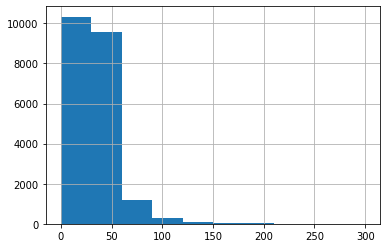

In [30]:
data['living_area'].hist(range=(0,300))

Анализируя распределение жилых площадей квартир на основании графика и таблицы с основными статистичискими параметрами , можно сказать что жилая площадь варируется от 2 до 409 метров, средняя жилая площадь квартир равна почти 35 кв.м. Площадь в 2 кв.м. очень подозрительна.


- площадь кухни

In [31]:
data['kitchen_area'].describe()

count    21236.000000
mean        10.568749
std          5.897725
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

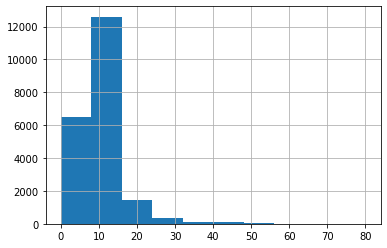

In [32]:
data['kitchen_area'].hist(range=(0,80))

Анализируя распределение площадей кухонь на основании графика и таблицы с основными статистичискими параметрами , можно сказать что площадь кухонь варируется от 1.3 до 112 метров, средняя площадь кухонь равна 10.5 кв.м. Площадь в 1.3 кв.м. вряд ли возможно в реальности

- цена объекта

In [33]:
data['last_price_lemon']=data['last_price']/1000000
data['last_price_lemon'].describe()

count    23425.000000
mean         6.548526
std         10.854945
min          0.012190
25%          3.450000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_lemon, dtype: float64

<AxesSubplot:>

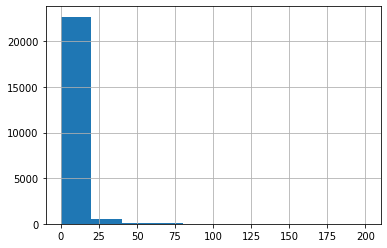

In [34]:
data['last_price_lemon'].hist(range=(0,200))

Анализируя распределение стоимости квартир на основании графика и таблицы с основными статистичискими параметрами , можно сказать что стоимость квартир варируется от 0.01 до 763 миллионов, средняя стоимость квартиры равна почти 7 миллионов

- количество комнат

In [35]:
data['rooms'].describe()

count    23425.000000
mean         2.071419
std          1.079284
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

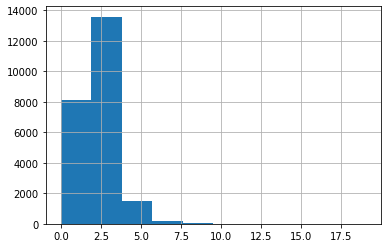

In [36]:
data['rooms'].hist()

In [37]:
data['rooms'].value_counts()

1     7961
2     7834
3     5754
4     1169
5      323
0      191
6      103
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

 Анализируя распределение количества комнат в квартирах на основании графика и таблицы с основными статистичискими параметрами , можно сказать что количество комнат варируется от 0 до 19 , среднее количество комнат равно 2. 194 объявления с количеством комнат равным 0

- высота потолков

In [38]:
data['ceiling_height'].describe()

count    23425.000000
mean         2.702834
std          0.221339
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

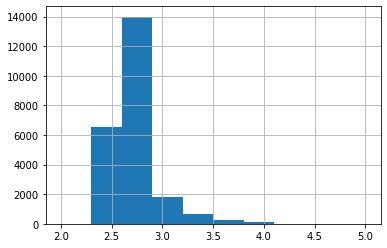

In [39]:
data['ceiling_height'].hist()

In [40]:
data['ceiling_height'].value_counts()

2.70    7759
2.50    4167
2.60    2134
2.55    1571
2.75    1118
        ... 
3.59       1
3.48       1
4.90       1
2.49       1
4.65       1
Name: ceiling_height, Length: 173, dtype: int64

Анализируя распределение высот потолков в квартирах на основании графика и таблицы с основными статистичискими параметрами , можно сказать что высоты потолков варируется от 2 до 5 , средняя высота потолков равна 2.7. Стоит отметить,что диапазон 2-5 метров был установлен мной выше в разделе обработки аномальных значений. Для более подробного анализа этих параметров стоило бы перепроверить исходные данные, проконсультироваться, возможно изменить диапазон.

- этаж квартиры

In [41]:
data['floor'].describe()

count    23425.000000
mean         5.894941
std          4.877445
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

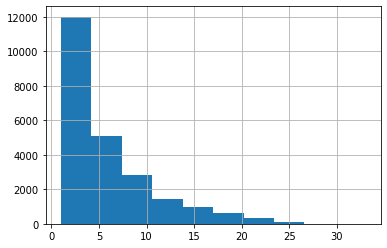

In [42]:
data['floor'].hist()

In [43]:
data['floor'].value_counts()

2     3320
3     3039
1     2869
4     2777
5     2590
6     1291
7     1208
8     1074
9     1045
10     684
11     520
12     519
13     376
15     339
14     332
16     315
17     225
18     175
19     144
21     119
22     111
20     108
23      98
24      61
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

Анализируя распределение этажей квартир из объявлений на основании графика и таблицы с основными статистичискими параметрами , можно сказать что этажность продаваемых квартир варируется от 1 до 33 , медианный этаж четвертый. Больше всего квартир продается на втором этаже.

- тип этажа квартиры

In [44]:
data['floor_type'].value_counts()

другой       17273
последний     3306
первый        2846
Name: floor_type, dtype: int64

<AxesSubplot:>

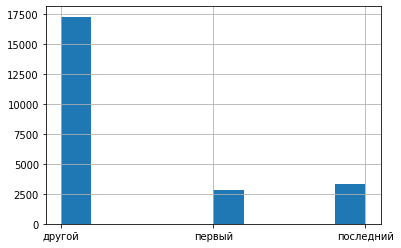

In [45]:
data['floor_type'].hist()

По графику и таблтце видно,что больше всего квартир продается с "другого" этажа.

- общее количество этажей в доме

In [46]:
data['floors_total'].describe()

count    23425.000000
mean        10.710309
std          6.592216
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

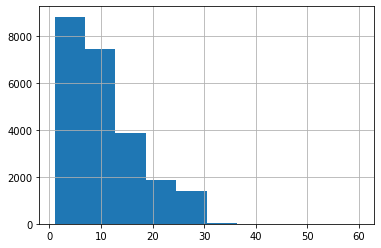

In [47]:
data['floors_total'].hist()

In [48]:
data['floors_total'].value_counts()

5     5712
9     3756
16    1372
12    1360
4     1179
10    1174
25    1075
6      906
17     832
3      645
7      588
14     552
18     504
24     462
8      387
15     365
2      358
23     349
19     339
22     286
20     271
13     229
11     202
27     164
21     158
26     124
35      24
1       23
28      21
36       3
34       1
60       1
52       1
29       1
33       1
Name: floors_total, dtype: int64

Анализируя распределение общего количества этажей в домах где продаются квартиры, на основании графика и таблицы с основными статистичискими параметрами , можно сказать что этажность домов где продаются квартиры варируется от 1 до 60, медианный этаж 9. Больше всего квартир продается в домах с количеством этажей равным пяти

- расстояние до центра города в метрах

In [49]:
data['cityCenters_nearest'].describe()

count    18113.000000
mean     14194.260007
std       8607.907516
min        181.000000
25%       9265.000000
50%      13073.000000
75%      16275.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

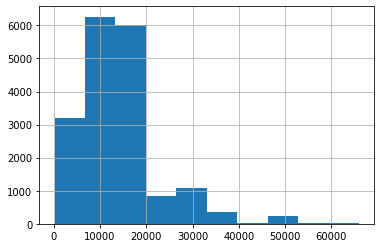

In [50]:
data['cityCenters_nearest'].hist()

Анализируя распределение расстояний от домов где продаются квартиры до центра города, на основании графика и таблицы с основными статистичискими параметрами , можно сказать что в среднем до ближайшего города 14 км. Самый дальний дом находится на расстоянии 65 км, ближайший на расстоянии 181 м.

- расстояние до ближайшего аэропорта

In [51]:
data['airports_nearest'].describe()

count    18021.000000
mean     28797.808113
std      12634.295894
min          0.000000
25%      18557.000000
50%      26758.000000
75%      37277.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

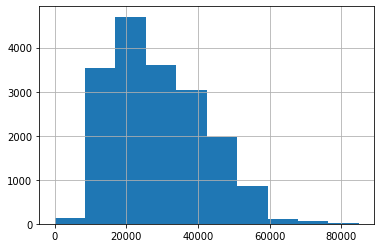

In [52]:
data['airports_nearest'].hist()

Анализируя распределение расстояний от домов где продаются квартиры до аэропорта, на основании графика и таблицы с основными статистичискими параметрами , можно сказать что в среднем до ближайшего аэропорта 28 км. Самый дальний дом находится на расстоянии 84 км, ближайший на расстоянии 0 м, что вызывает вопросы к данным.

- расстояние до ближайшего парка

In [53]:
data['parks_nearest'].describe()

count    8020.000000
mean      490.721072
std       341.710178
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

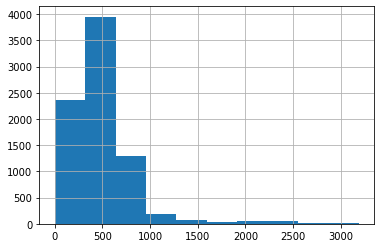

In [54]:
data['parks_nearest'].hist()

Анализируя распределение расстояний от домов где продаются квартиры до парка , на основании графика и таблицы с основными статистичискими параметрами , можно сказать что в среднем до ближайшего парка 490 м. Самый дальний дом находится на расстоянии 3 км, ближайший на расстоянии 1 м.

- день и месяц публикации объявления

In [55]:
data['first_day_exposition'].dt.month.value_counts()

2     2619
3     2556
11    2346
4     2345
10    2099
9     1962
6     1730
8     1728
7     1676
12    1626
1     1482
5     1256
Name: first_day_exposition, dtype: int64

<AxesSubplot:>

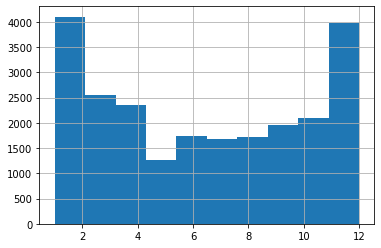

In [56]:
data['first_day_exposition'].dt.month.hist()

По данному распределению видно,что объявления публикуются активнее в начале и конце года, в середине года количество публикаций меньше более чем в два раза.

In [57]:
data['first_day_exposition'].dt.day.value_counts()

1     1119
10    1087
26     887
20     860
12     860
14     828
11     825
13     821
15     818
21     813
22     795
27     790
9      780
8      773
19     763
18     758
25     749
28     742
17     740
16     723
7      720
23     706
4      699
24     674
29     674
2      668
6      656
3      644
5      615
30     518
31     320
Name: first_day_exposition, dtype: int64

<AxesSubplot:>

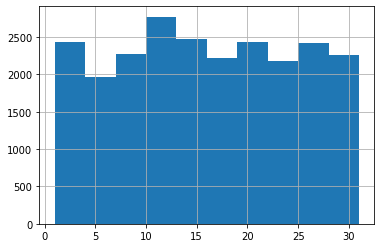

In [58]:
data['first_day_exposition'].dt.day.hist()

По данному распределению видно,что объявления публикуются практичиски с одинаковой частотой каждый день в течении месяца.

- Изучите, как быстро продавались квартиры

In [59]:
data['days_exposition'].describe()

count    23425.000000
mean       156.664376
std        213.790957
min          0.000000
25%         22.000000
50%         73.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

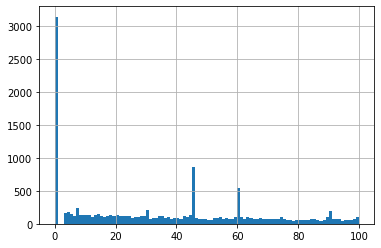

In [96]:
data['days_exposition'].hist(bins = 100, range=(0,100))

In [61]:
data['days_exposition'].value_counts()

0.0       3143
45.0       859
60.0       537
7.0        233
30.0       207
          ... 
1114.0       1
920.0        1
1135.0       1
1105.0       1
1174.0       1
Name: days_exposition, Length: 1140, dtype: int64

 По данному распределению видно,что продажа квартиры занимает от 0 до 1580 дней. В 1580 дней еще можно поверить, хоть и мало вероятно. Непонятно что означает 0 ,либо продажу в тот же день, либо просто ошибку в заполнении.Медианное значение количества дней на продажу равно 73. Больше всего продали в 45 и 60 день, если не считать нули то в первый день.
Чем больше дней висит объявление, тем меньшее количество квартир продаётся. Падение продаж начинается где-то с 30 дней.

 ### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта.

- Изучим зависимость полной стоимости квартиры от общей площади.

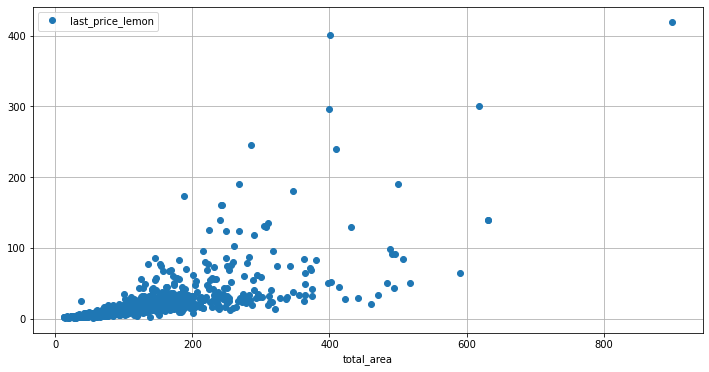

In [62]:
data.pivot_table(index='total_area',values='last_price_lemon').plot(style='o',grid=True,figsize=(12,6))
plt.show()

In [63]:
data['total_area'].corr(data['last_price_lemon'])

0.6518819429087368

Наблюдается зависимость цены квартиры от общей площади квартиры

- Изучим зависимость полной стоимости квартиры от жилой площади.

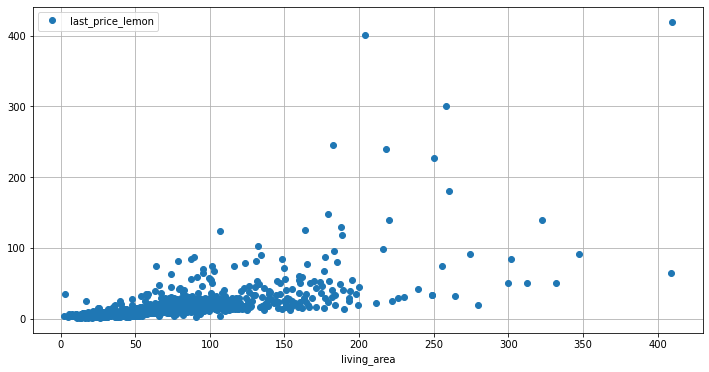

In [64]:
data.pivot_table(index='living_area',values='last_price_lemon').plot(style='o',grid=True,figsize=(12,6))
plt.show()

In [65]:
data['living_area'].corr(data['last_price_lemon'])

0.5636597137841581

Наблюдается зависимость цены квартиры от жилой площади квартиры

- Изучим зависимость полной стоимости квартиры от площади кухни.

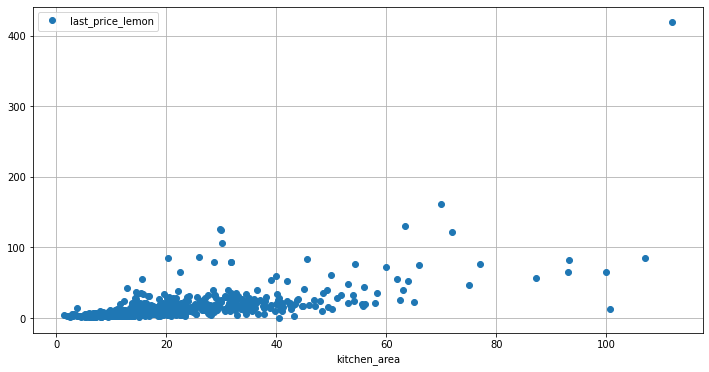

In [66]:
data.pivot_table(index='kitchen_area',values='last_price_lemon').plot(style='o',grid=True,figsize=(12,6))
plt.show()

In [67]:
data['kitchen_area'].corr(data['last_price_lemon'])

0.518437434957442

Наблюдается зависимость цены квартиры от кухонной площади квартиры

- Изучим зависимость полной стоимости квартиры от количества комнат.

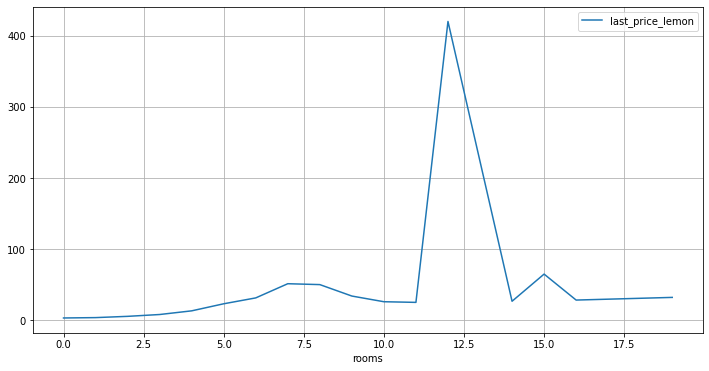

In [68]:
data.pivot_table(index='rooms',values='last_price_lemon').plot(grid=True,figsize=(12,6))
plt.show()

In [69]:
data['rooms'].corr(data['last_price_lemon'])

0.3626230398073106

Наблюдается зависимость цены квартиры от количества комнат

- Изучим зависимость полной стоимости квартиры от типа этажа.

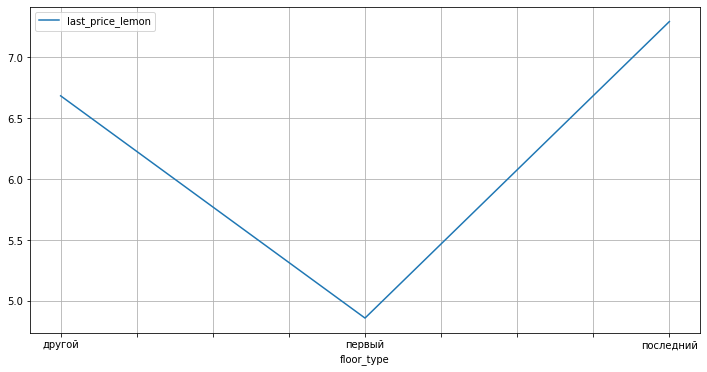

In [70]:
data.pivot_table(index='floor_type',values='last_price_lemon').plot(grid=True,figsize=(12,6))
plt.show()

Самые дешевые квартиры продаются на первом этаже. Самые дорогие на последнем.

## Изучим зависимость полной стоимости квартиры от даты размещения.

- зависимость стоимости от дня публикации.

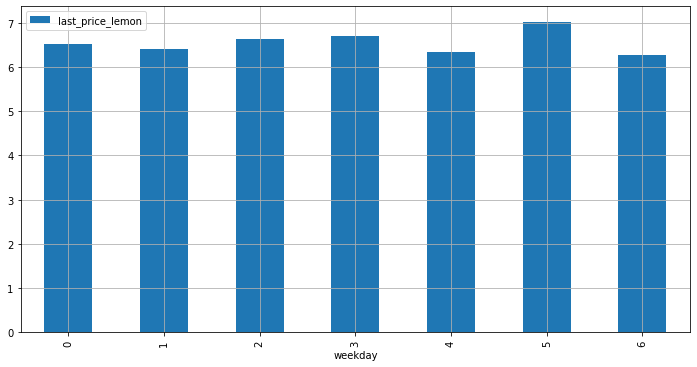

In [71]:
data.pivot_table(index='weekday',values='last_price_lemon').plot(kind='bar',grid=True,figsize=(12,6))
plt.show()

- Зависимость стоимости от месяца публикации.

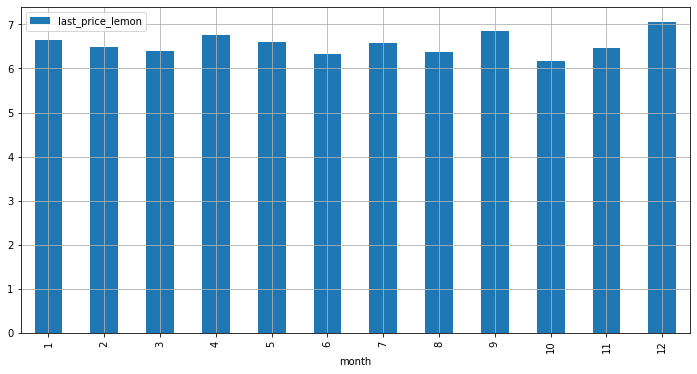

In [72]:
data.pivot_table(index='month',values='last_price_lemon').plot(kind='bar',grid=True,figsize=(12,6))
plt.show()

- Зависимость стоимости от года публикации.

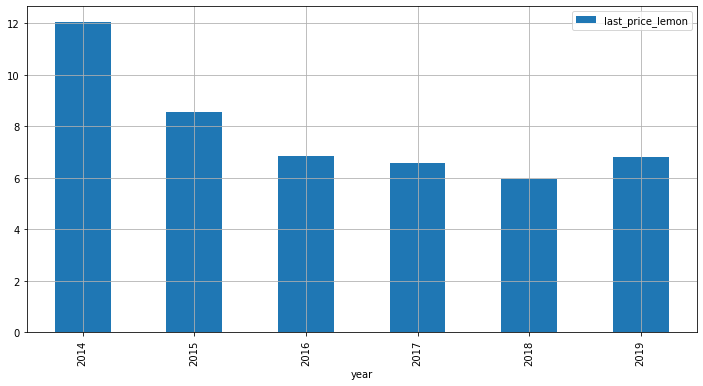

In [73]:
data.pivot_table(index='year',values='last_price_lemon').plot(kind='bar',grid=True,figsize=(12,6))
plt.show()

Изучив зависимость стоимости квартир от дня,месяца и года размещения выявлено:

- стоимость квартир немного ниже в объявлениях,которые размещались в конце недели.
- стоимость квартир самая большая в объявлениях, которые размещались в декабре.
- стоимость квартир по годам падала с 2014 до 2016 года, с 2016 по 2019 год стоимость примерно одинаковая.

- Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [74]:
dt=data.pivot_table(index='locality_name',values='price_per_metre',aggfunc=(
    'median','count')).sort_values('count',ascending=False)

In [75]:
dt.head(10)

,count,median
locality_name,,
Санкт-Петербург,15637,104761.904762
поселок Мурино,552,86059.293995
поселок Шушары,439,76829.268293
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
поселок Парголово,327,91642.857143
Гатчина,307,67796.610169
деревня Кудрово,299,91860.465116


Больше всего объявлений в Санкт-Петербурге и стоимость одного квадратного метра там самая дорогая- почти 105 тысяч.

- Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра

In [76]:
Peter_data=data.query('locality_name=="Санкт-Петербург"')

In [77]:
Peter_data['price_per_km']=Peter_data['last_price']/Peter_data['km_to_city']

/tmp/ipykernel_75/3541942587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Peter_data['price_per_km']=Peter_data['last_price']/Peter_data['km_to_city']


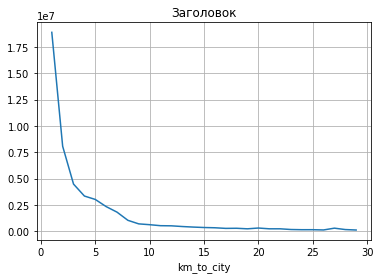

In [78]:
Peter_data.groupby('km_to_city')['price_per_km'].mean().plot(grid = True, title = 'Заголовок')
plt.show()


Чем дольше от цетра,тем дешевле стоит объект. Все логично.

###  Общий вывод


На основании полученных иследований можно зафиксировать параметры в среднем самой популярной квартиры:<br>
общая площадь-61 км.м.<br>
жилая площадь-35 кв.м.<br>
площадь кухни-10.5 кв.м.<br>
стоимость-7 млн.<br>
кол.комнат-2<br>
высота потолков-2.7 м<br>
этаж квартиры-4<br>
этажность дома-9<br>
расстояние до центра города-14 км<br>
расстояние до аэропорта-28 км.<br>
расстояние до парка-477 м.<br>
Больше всего квартир продают на "другом" этаже.<br>
Количество объявлений в начале и конце года значительно больше чем в середине.<br>

Изучая количество дней, необходимое для продажи было определено медианное значение количества дней на продажу, оно равно 72.
Больше всего продали за 45 и 60 день продаж.<br>

Изучили зависимость общей стоимости квартир от следующих параметров:

- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

Для каждой зависимотри посчитали коэффициент корреляции и определили,что больше всего стоимость квартиры зависит от **общей площади квартиры.**